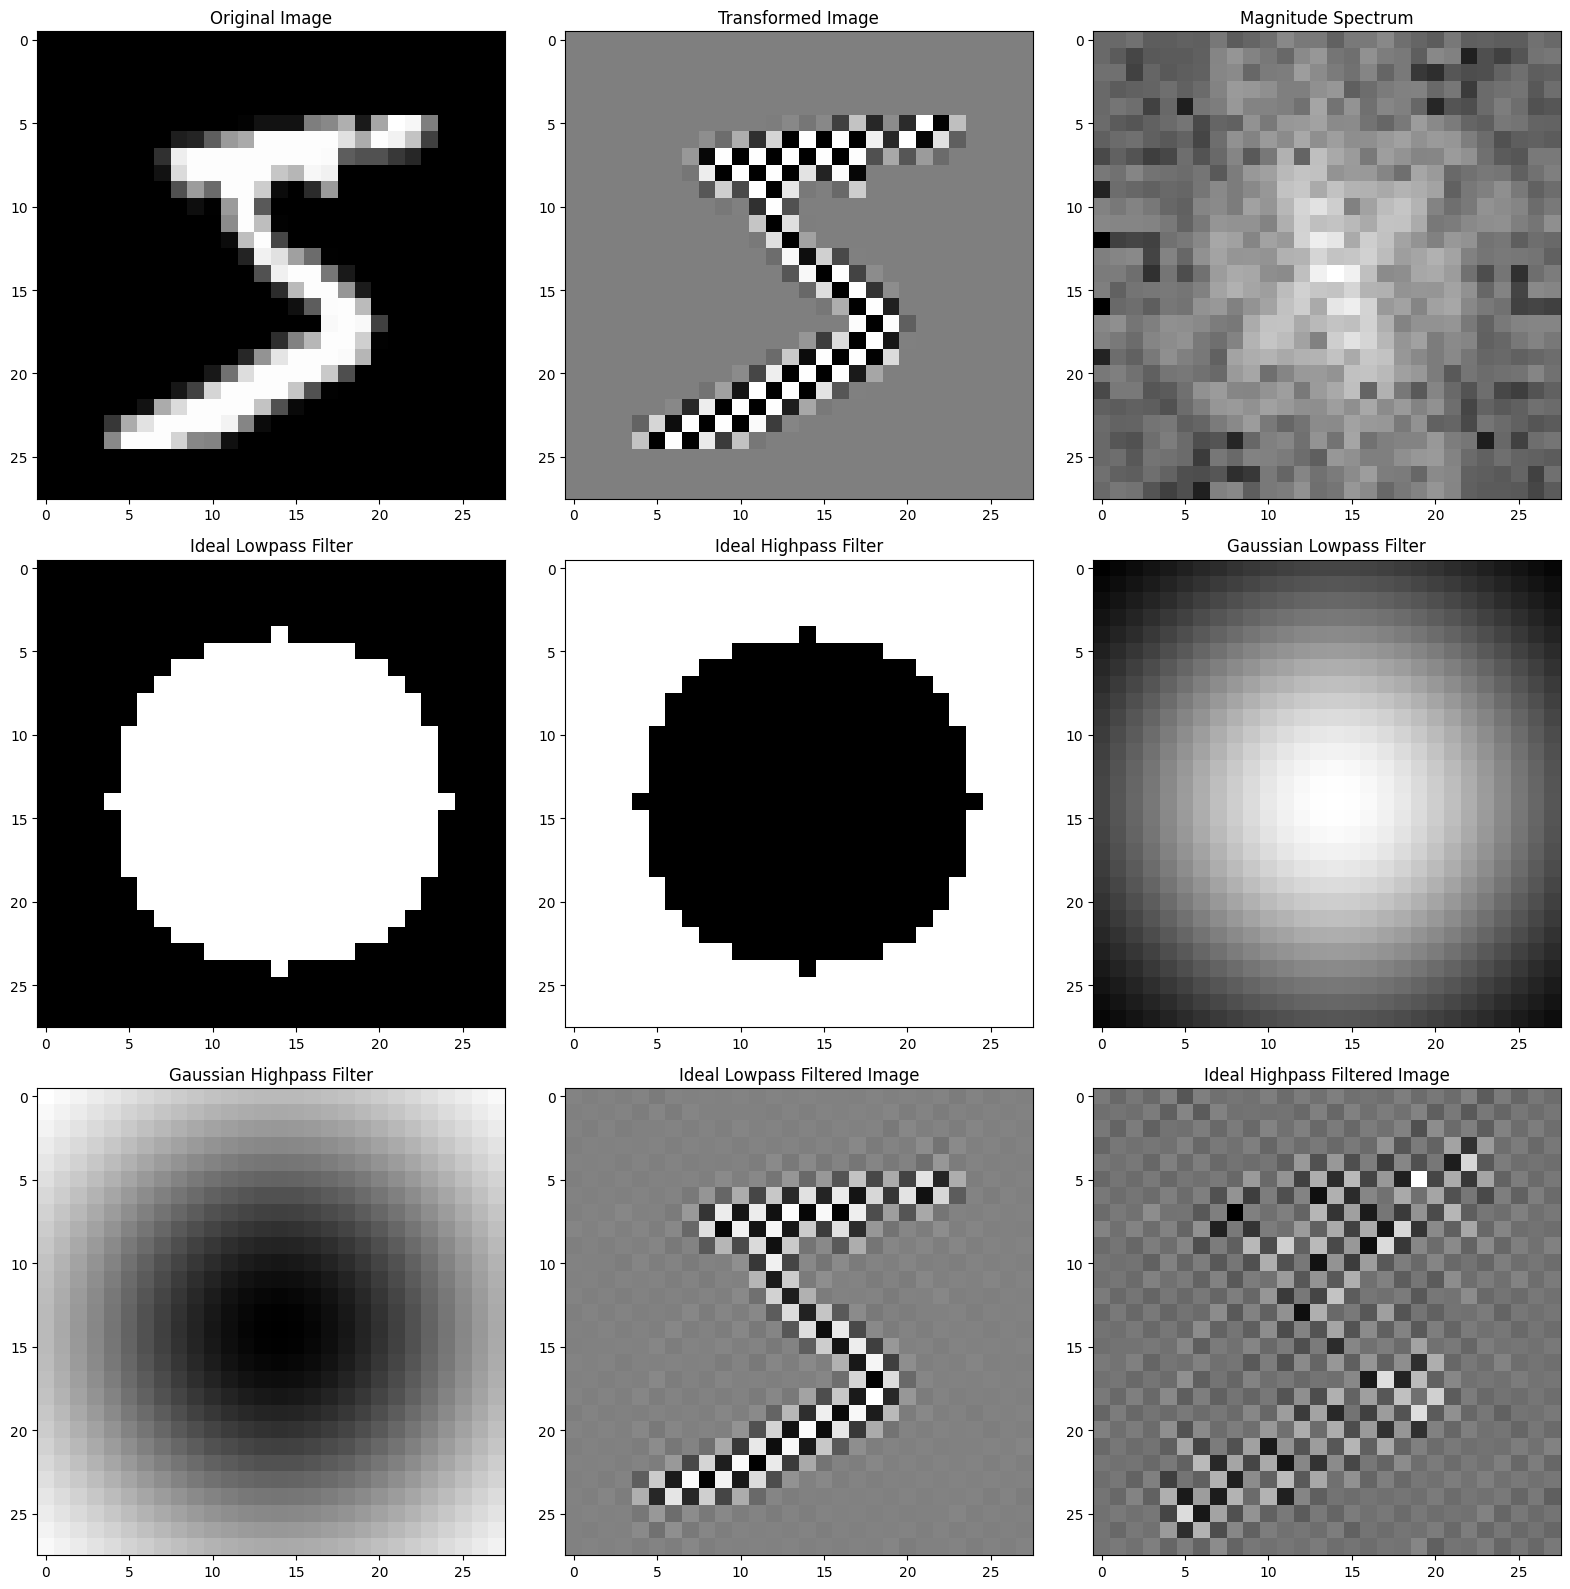

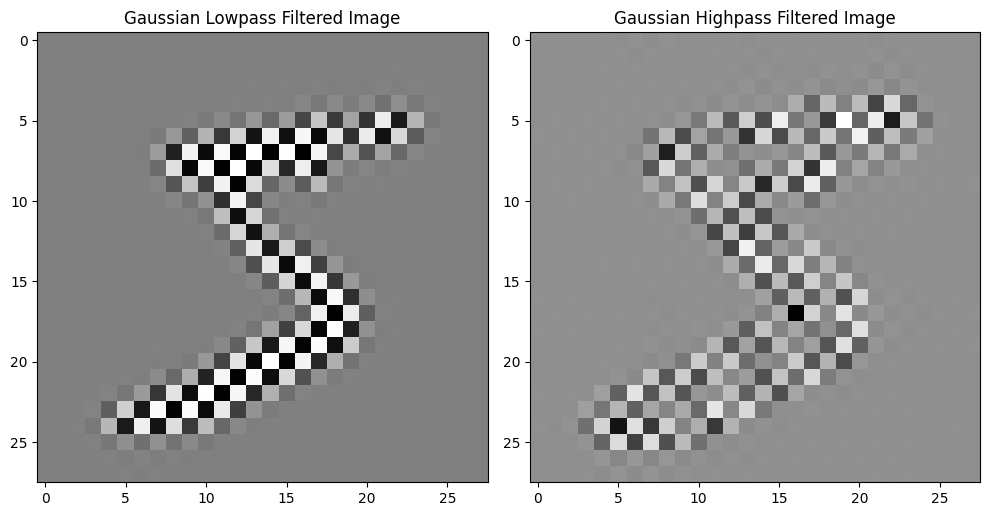

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

train = pd.read_csv('mnist_train.csv')
image = train.iloc[0, 1:].values.reshape(28, 28).astype(np.float32)

rows, cols = image.shape
new_image = np.zeros((rows, cols), dtype=np.float32)

for i in range(rows):
    for j in range(cols):
        new_image[i, j] = image[i, j] * ((-1) ** (i + j))

f_transform = np.fft.fft2(new_image)
magnitude_spectrum = np.abs(f_transform)

shape = f_transform.shape
D0 = 10
M, N = shape
center = (M // 2, N // 2)
X, Y = np.ogrid[:M, :N]
D = np.sqrt((X - center[0]) ** 2 + (Y - center[1]) ** 2)

H_ideal_lowpass_filter = np.where(D <= D0, 1, 0)
H_ideal_highpass_filter = np.where(D > D0, 1, 0)
H_gaussian_lowpass_filter = np.exp(-(D ** 2) / (2 * (D0 ** 2)))
H_gaussian_highpass_filter = 1 - H_gaussian_lowpass_filter

G_ideal_lowpass = f_transform * H_ideal_lowpass_filter
g_ideal_lowpass = np.fft.ifft2(G_ideal_lowpass)
g_ideal_lowpass = np.abs(g_ideal_lowpass)

G_ideal_highpass = f_transform * H_ideal_highpass_filter
g_ideal_highpass = np.fft.ifft2(G_ideal_highpass)
g_ideal_highpass = np.abs(g_ideal_highpass)

G_gaussian_lowpass = f_transform * H_gaussian_lowpass_filter
g_gaussian_lowpass = np.fft.ifft2(G_gaussian_lowpass)
g_gaussian_lowpass = np.abs(g_gaussian_lowpass)

G_gaussian_highpass = f_transform * H_gaussian_highpass_filter
g_gaussian_highpass = np.fft.ifft2(G_gaussian_highpass)
g_gaussian_highpass = np.abs(g_gaussian_highpass)

new_g_ideal_lowpass = np.zeros((rows, cols), dtype=np.float32)
new_g_ideal_highpass = np.zeros((rows, cols), dtype=np.float32)
new_g_gaussian_lowpass = np.zeros((rows, cols), dtype=np.float32)
new_g_gaussian_highpass = np.zeros((rows, cols), dtype=np.float32)

for i in range(rows):
    for j in range(cols):
        new_g_ideal_lowpass[i, j] = g_ideal_lowpass[i, j] * ((-1) ** (i + j))
        new_g_ideal_highpass[i, j] = g_ideal_highpass[i, j] * ((-1) ** (i + j))
        new_g_gaussian_lowpass[i, j] = g_gaussian_lowpass[i, j] * ((-1) ** (i + j))
        new_g_gaussian_highpass[i, j] = g_gaussian_highpass[i, j] * ((-1) ** (i + j))

plt.figure(figsize=(16, 16))

plt.subplot(3, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(3, 3, 2)
plt.imshow(new_image, cmap='gray')
plt.title('Transformed Image')

plt.subplot(3, 3, 3)
plt.imshow(np.log(1 + magnitude_spectrum), cmap='gray')
plt.title('Magnitude Spectrum')

plt.subplot(3, 3, 4)
plt.imshow(H_ideal_lowpass_filter, cmap='gray')
plt.title('Ideal Lowpass Filter')

plt.subplot(3, 3, 5)
plt.imshow(H_ideal_highpass_filter, cmap='gray')
plt.title('Ideal Highpass Filter')

plt.subplot(3, 3, 6)
plt.imshow(H_gaussian_lowpass_filter, cmap='gray')
plt.title('Gaussian Lowpass Filter')

plt.subplot(3, 3, 7)
plt.imshow(H_gaussian_highpass_filter, cmap='gray')
plt.title('Gaussian Highpass Filter')

plt.subplot(3, 3, 8)
plt.imshow(new_g_ideal_lowpass, cmap='gray')
plt.title('Ideal Lowpass Filtered Image')

plt.subplot(3, 3, 9)
plt.imshow(new_g_ideal_highpass, cmap='gray')
plt.title('Ideal Highpass Filtered Image')

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.imshow(new_g_gaussian_lowpass, cmap='gray')
plt.title('Gaussian Lowpass Filtered Image')

plt.subplot(1, 2, 2)
plt.imshow(new_g_gaussian_highpass, cmap='gray')
plt.title('Gaussian Highpass Filtered Image')

plt.tight_layout()
plt.show()


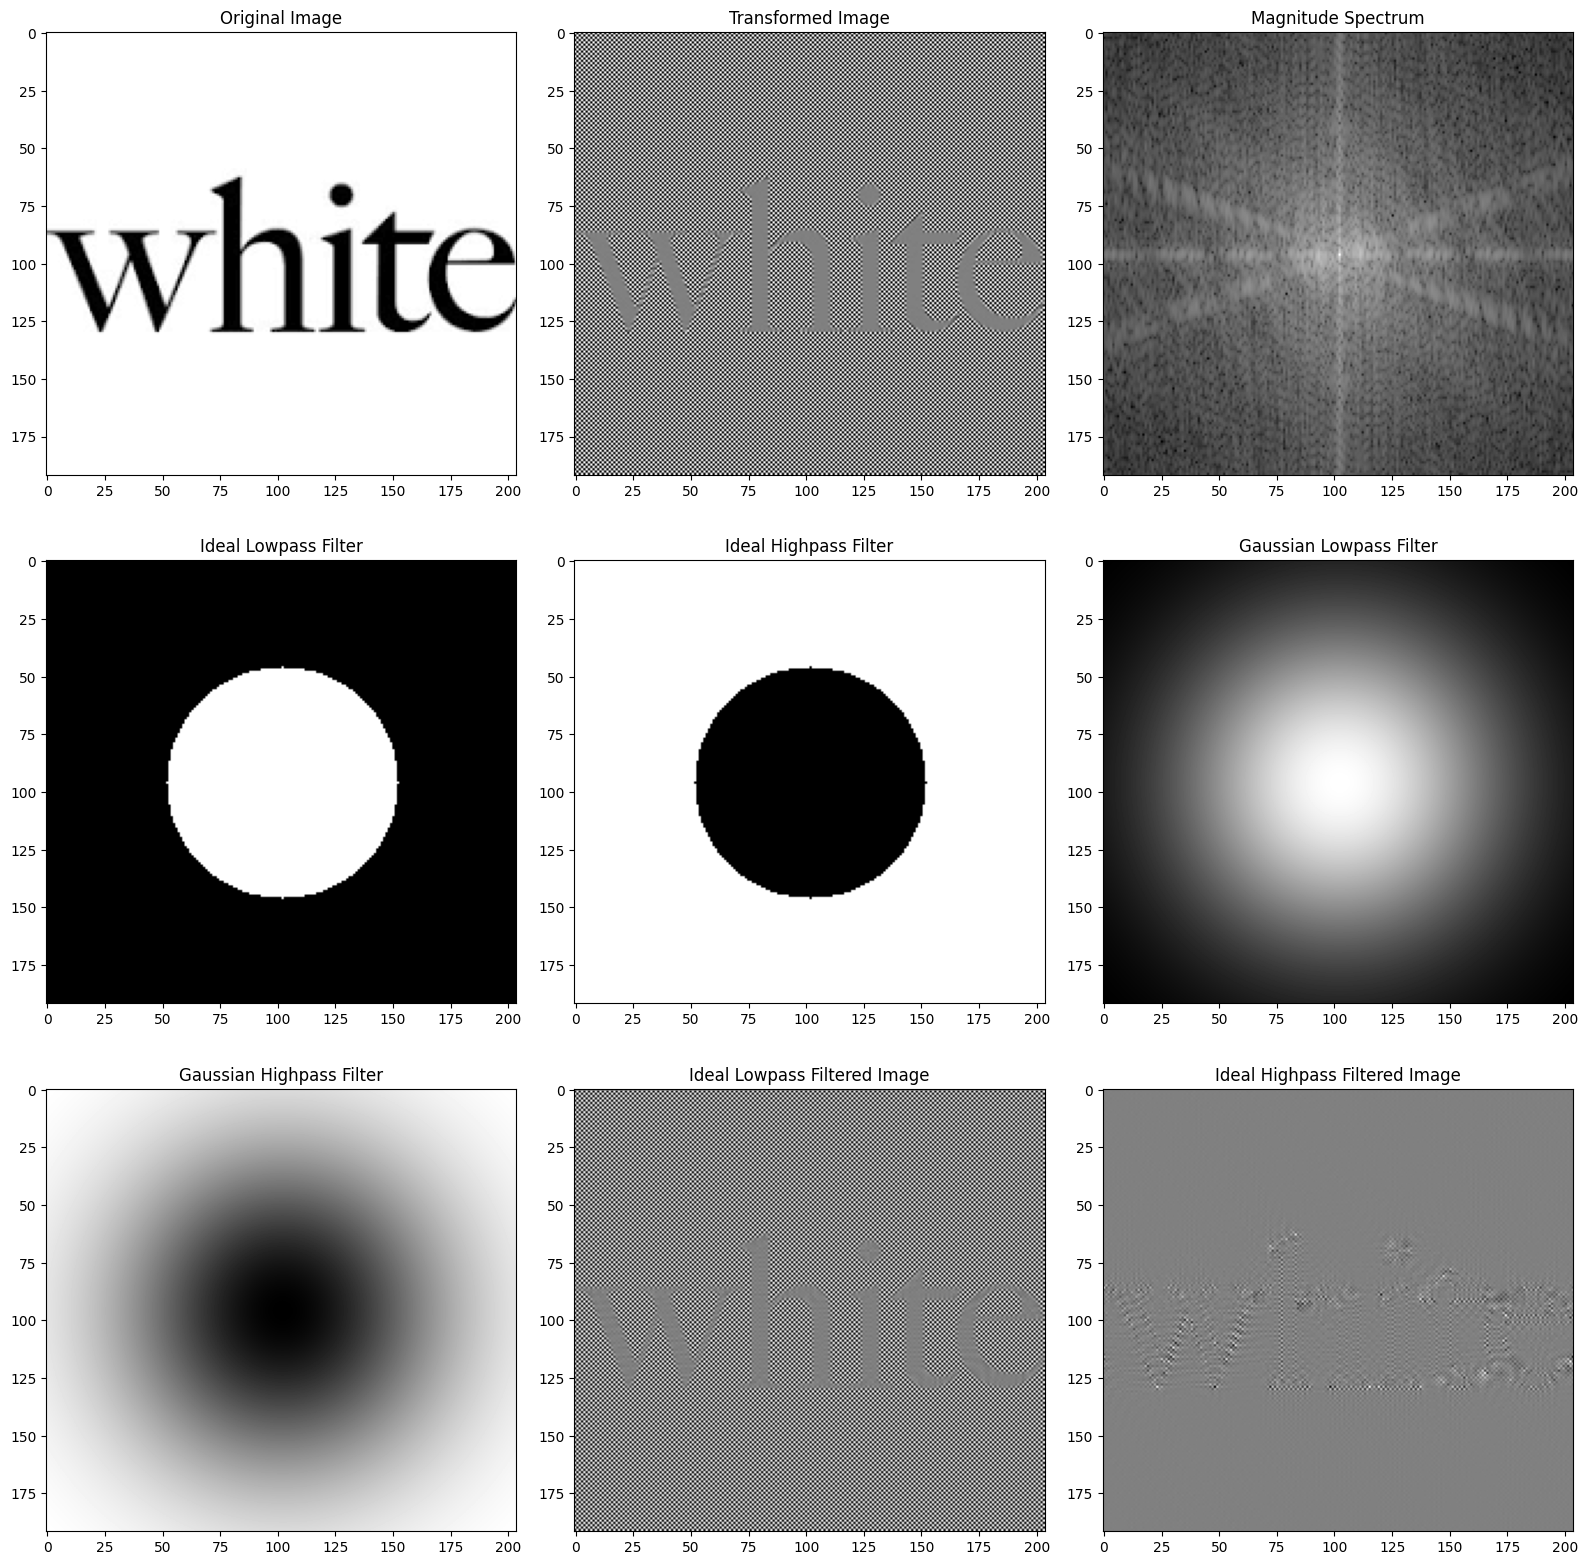

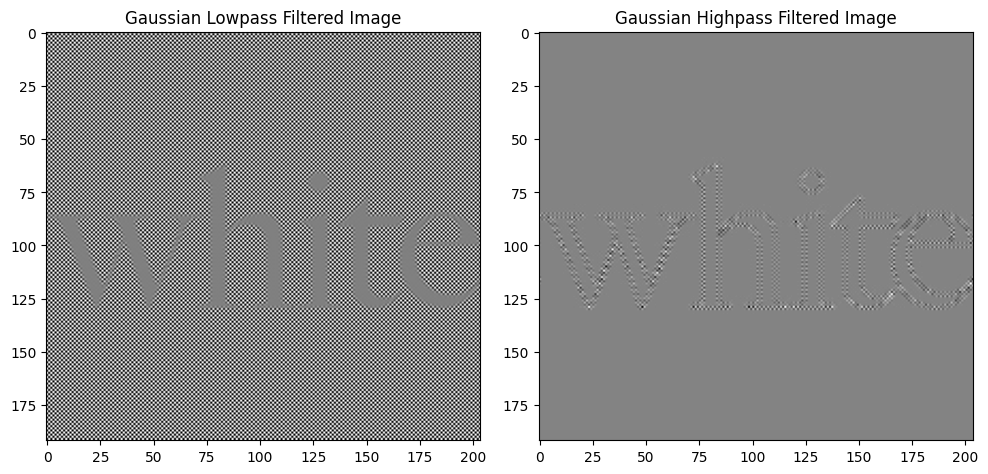

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

image_path = '2.png'
image = np.array(Image.open(image_path).convert('L')).astype(np.float32)

rows, cols = image.shape
new_image = np.zeros((rows, cols), dtype=np.float32)

for i in range(rows):
    for j in range(cols):
        new_image[i, j] = image[i, j] * ((-1) ** (i + j))

f_transform = np.fft.fft2(new_image)
magnitude_spectrum = np.abs(f_transform)

shape = f_transform.shape
D0 = 50
M, N = shape
center = (M // 2, N // 2)
X, Y = np.ogrid[:M, :N]
D = np.sqrt((X - center[0]) ** 2 + (Y - center[1]) ** 2)

H_ideal_lowpass_filter = np.where(D <= D0, 1, 0)
H_ideal_highpass_filter = np.where(D > D0, 1, 0)
H_gaussian_lowpass_filter = np.exp(-(D ** 2) / (2 * (D0 ** 2)))
H_gaussian_highpass_filter = 1 - H_gaussian_lowpass_filter

G_ideal_lowpass = f_transform * H_ideal_lowpass_filter
g_ideal_lowpass = np.fft.ifft2(G_ideal_lowpass)
g_ideal_lowpass = np.abs(g_ideal_lowpass)

G_ideal_highpass = f_transform * H_ideal_highpass_filter
g_ideal_highpass = np.fft.ifft2(G_ideal_highpass)
g_ideal_highpass = np.abs(g_ideal_highpass)

G_gaussian_lowpass = f_transform * H_gaussian_lowpass_filter
g_gaussian_lowpass = np.fft.ifft2(G_gaussian_lowpass)
g_gaussian_lowpass = np.abs(g_gaussian_lowpass)

G_gaussian_highpass = f_transform * H_gaussian_highpass_filter
g_gaussian_highpass = np.fft.ifft2(G_gaussian_highpass)
g_gaussian_highpass = np.abs(g_gaussian_highpass)

new_g_ideal_lowpass = np.zeros((rows, cols), dtype=np.float32)
new_g_ideal_highpass = np.zeros((rows, cols), dtype=np.float32)
new_g_gaussian_lowpass = np.zeros((rows, cols), dtype=np.float32)
new_g_gaussian_highpass = np.zeros((rows, cols), dtype=np.float32)

for i in range(rows):
    for j in range(cols):
        new_g_ideal_lowpass[i, j] = g_ideal_lowpass[i, j] * ((-1) ** (i + j))
        new_g_ideal_highpass[i, j] = g_ideal_highpass[i, j] * ((-1) ** (i + j))
        new_g_gaussian_lowpass[i, j] = g_gaussian_lowpass[i, j] * ((-1) ** (i + j))
        new_g_gaussian_highpass[i, j] = g_gaussian_highpass[i, j] * ((-1) ** (i + j))

plt.figure(figsize=(16, 16))

plt.subplot(3, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(3, 3, 2)
plt.imshow(new_image, cmap='gray')
plt.title('Transformed Image')

plt.subplot(3, 3, 3)
plt.imshow(np.log(1 + magnitude_spectrum), cmap='gray')
plt.title('Magnitude Spectrum')

plt.subplot(3, 3, 4)
plt.imshow(H_ideal_lowpass_filter, cmap='gray')
plt.title('Ideal Lowpass Filter')

plt.subplot(3, 3, 5)
plt.imshow(H_ideal_highpass_filter, cmap='gray')
plt.title('Ideal Highpass Filter')

plt.subplot(3, 3, 6)
plt.imshow(H_gaussian_lowpass_filter, cmap='gray')
plt.title('Gaussian Lowpass Filter')

plt.subplot(3, 3, 7)
plt.imshow(H_gaussian_highpass_filter, cmap='gray')
plt.title('Gaussian Highpass Filter')

plt.subplot(3, 3, 8)
plt.imshow(new_g_ideal_lowpass, cmap='gray')
plt.title('Ideal Lowpass Filtered Image')

plt.subplot(3, 3, 9)
plt.imshow(new_g_ideal_highpass, cmap='gray')
plt.title('Ideal Highpass Filtered Image')

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.imshow(new_g_gaussian_lowpass, cmap='gray')
plt.title('Gaussian Lowpass Filtered Image')

plt.subplot(1, 2, 2)
plt.imshow(new_g_gaussian_highpass, cmap='gray')
plt.title('Gaussian Highpass Filtered Image')

plt.tight_layout()
plt.show()
